# Supporting Calculations and Visualizations for Challenges and Opportunities in Converting CO$_2$ to Carbohydrates 

### (c) 2022 Madelynn J. Watson, Alexander W. Dowling, Casey P. O'Brian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Nominal Case Analysis

This section of code shows the calculations of energy intensity, GHG emissions intensity, land-use intensity, and artificial carbohydrate cost using the nominal values from Table S1 in the SI.

### Energy Intensity

In [2]:
def energy_intensity(E_DAC=243, E_H2O=0.4, E_reaction=7800, water_efficiency=1, n=6, mw=180):
    '''Calculates the total energy intensity of artificial carbohydrate production, Eq 4 in the SI
        
          Arguments:  
              E_DAC: DAC energy requirement (kJ/mol of CO2)
              E_H2O: Water desalination energy requirement (kJ/mol of H2O)
              E_reaction: Reaction energy requirement (kJ/mol carbohydrate) 
              water_efficiency: Water use efficiency (dimentionless)
              n: Stoichiometry of H2O:carb and CO2:carb (dimentionless)
              mw: Molecular weight of carbohydrate (g/mol)
        
          Returns:
              Total energy intensity (kJ/kg carbohydrate)
             
    '''
    energy = (E_DAC*n + E_H2O*n*water_efficiency + E_reaction) / mw*1000  #kJ/kg
    return energy
 
# (MWh/Twh)*(kJ/MWh)*(Gt/kg)
kj_per_kg_to_TWh_per_Gt = 1000000 / (2.778e-7 * 1e12)

Energy_Intensity = energy_intensity()
print('Nominal energy intensity',np.round(Energy_Intensity,2),'kJ / kg glucose',',', np.round((Energy_Intensity/kj_per_kg_to_TWh_per_Gt),2), 'TWh / Gt glucose')

Nominal energy intensity 51446.67 kJ / kg glucose , 14291.88 TWh / Gt glucose


### Artificial Carbohydrate Cost

In [3]:
def carb_cost(energy=Energy_Intensity, energy_cost=80):
    '''Calculates the cost of artificial carbohydrate production, Eq 5 in the SI
        
          Arguments:  
              energy: Total energy intensity (kJ/kg carbohydrate)
              energy_cost: Cost of electricity ($/MWh)
        
          Returns:
              Artificial carbohydrate cost ($/Gt carbohydrate)
             
    ''' 
    #(kJ/MWh)*(Gt/kg)
    kj_per_kg_to_MWh_per_Gt = (2.778e-7 * 1e12)
    Cost = (energy *  kj_per_kg_to_MWh_per_Gt) * energy_cost
    return Cost
    
#(Gt/kg)
Gt_to_kg = 1e12

Artificial_carb_cost = carb_cost()
print('Nominal estimated cost of carbohydrate',np.round(Artificial_carb_cost/1e12,2),'Trillion $ / Gt glucose',np.round((Artificial_carb_cost/Gt_to_kg),2),'$ / kg glucose' )

Nominal estimated cost of carbohydrate 1.14 Trillion $ / Gt glucose 1.14 $ / kg glucose


### GHG Emissions Intensity

In [4]:
def emissions_intensity(mw_CO2=44, mw=180, n=6, CO2_intensity=10, energy=Energy_Intensity):
    '''Calculates the GHG emissions intensity of artificial carbohydrate production, Eqs 6-8 in the SI
        
          Arguments:  
              mw_CO2: Molecular weight of CO2 (g/mol)
              mw: Molecular weight of carbohydrate (g/mol)
              n: Stoichiometry of H2O:carb and CO2:carb (dimentionless)
              CO2_intensity: CO2 intensity of electricity source (gCO2eq/kWh)
              energy: Total energy intensity (kJ/kg carbohydrate)
        
          Returns:
              GHG emissions intensity(kg CO2eq/kg carbohydrate)
              CO2 consumed in reaction (kg CO2/kg carbohydrate)
              CO2 produced by electricity consumption (kg CO2eq/kg carbohydrate)
             
    '''
    #(g/kg)
    g_to_kg = 1000
    
    #(kJ/kWh)
    kj_to_kWh = 3600
    
    CO2_consumed = n*mw_CO2 / mw #kg of CO2 per kg carb
    CO2_emission_estimate = energy*CO2_intensity / g_to_kg / kj_to_kWh #kg CO2 / kg carb
    CO2_emissions = CO2_emission_estimate - CO2_consumed
    return CO2_emissions, CO2_consumed, CO2_emission_estimate
    
    
GHG_emissions_intensity = emissions_intensity()
print('CO2 consumed by reaction',np.round(GHG_emissions_intensity[1],2),'kg CO2 / kg glucose')
print('CO2 produced by solar powered electricty', np.round(GHG_emissions_intensity[2],2),'kg CO2 / kg glucose')
print('Nominal GHG emissions intensity', np.round(GHG_emissions_intensity[0],2), 'kg CO2 / kg glucose', ',',np.round(GHG_emissions_intensity[0],2),'Gt CO2 / Gt glucose')


CO2 consumed by reaction 1.47 kg CO2 / kg glucose
CO2 produced by solar powered electricty 0.14 kg CO2 / kg glucose
Nominal GHG emissions intensity -1.32 kg CO2 / kg glucose , -1.32 Gt CO2 / Gt glucose


### Water-use Intensity

In [5]:
def water_use(n=6, mw=180, mw_H2O=18, water_efficiency=1):
    '''Calculates the water-use intensity of artificial carbohydrate production, Eq 9 in the SI
        
          Arguments:  
              n: Stoichiometry of H2O:carb and CO2:carb (dimentionless)
              mw: Molecular weight of carbohydrate (g/mol)
              mw_H2O: Molecular weight of water (g/mol) 
              water_efficiency: Water use efficiency (dimentionless)
        
          Returns:
              Water-use intensity (kg H2O/kg carbohydrate)
             
    '''
    Water_intensity = n*mw_H2O / mw 
    return Water_intensity


Water_use_intensity = water_use()

print('Nominal water-use intensity', Water_use_intensity, 'kg water/kg glucose',',', Water_use_intensity, 'Gt water/Gt glucose')

Nominal water-use intensity 0.6 kg water/kg glucose , 0.6 Gt water/Gt glucose


### Land-use Intensity

In [6]:
def land_intensity(energy=Energy_Intensity, lau=500):
    '''Calculates the land-use intensity of artificial carbohydrate production, Eq 10 in the SI
        
          Arguments:  
              energy: Total energy intensity (kJ/kg carbohydrate)
              lau: Land-use factor of solar field (m2/GWh)
        
          Returns:
              Land-use intensity (hectares/Gt carbohydrate)
             
    '''
    #(m2/GWh)(GWh/TWh)(hectares/m2)
    m2_per_GWh_to_hectares_per_TWh = 0.1    
    
    land_use = (energy/kj_per_kg_to_TWh_per_Gt) * lau * m2_per_GWh_to_hectares_per_TWh
    return land_use


Land_use_intensity = land_intensity()

print('Nominal land-use intensity from solar fields', np.round(Land_use_intensity/1e6,2), 'million hectares / Gt glucose')

Nominal land-use intensity from solar fields 0.71 million hectares / Gt glucose


### Electricty-to-Carbohydrate Efficiency

In [24]:
def theoretical_reaction_energy(H_fcarb = -1273.6 , H_fwater = -285.8, H_fco2 = -393.5, H_foxygen = 0 , n = 6):
    '''Calculates the thermodynamic rection energy for CO2 to glucose, Eq 2 in the SI
        
          Arguments:  
              H_fcarb: Heat of formation of solid glucose (kJ/mol glucose)
              H_fwater: Heat of formation of liquid water (kJ/mol water)
              H_fco2: Heat of formation of co2 gas (kJ/mol co2)
              H_foxygen: Heat of formation of oxygen gas (kJ/mol oxygen)
              n: Stoichiometry of H2O:carb and CO2:carb (dimentionless)
        
          Returns:
              delta_H: Thermodynamic reaction energy requirement (kJ/mol glucose)
             
    '''
    delta_H = (H_fcarb + H_foxygen) - (H_fco2*n + H_fwater*n)
    return delta_H
    
    
def elec_to_carb_eff(E_DAC_theo=19.5, E_H2O_theo=0.008,E_DAC=243, E_H2O=0.4, E_reaction=7800, water_efficiency=1, n=6, delta_H = theoretical_reaction_energy()):
    '''Calculates the electricity-to-carb efficiency, Eq 5 in the SI
        
          Arguments:  
              E_DAC_theo: DAC thermodynamic energy requirement (kJ/mol of CO2)
              E_H2O_theo: Water desalination thermodynamic energy requirement (kJ/mol of H2O)
              E_DAC: DAC energy requirement (kJ/mol of CO2)
              E_H2O: Water desalination energy requirement (kJ/mol of H2O)
              E_reaction: Reaction energy requirement (kJ/mol carbohydrate) 
              water_efficiency: Water use efficiency (dimentionless)
              n: Stoichiometry of H2O:carb and CO2:carb (dimentionless)
              delta_H: Thermodynamic reaction energy requirement (kJ/mol carbohydrate)
        
          Returns:
              electricity-to-carb efficiency (dimentionless)
             
    '''
    minimum_E = (6*E_DAC_theo + 6*E_H2O_theo + delta_H)
    total_E = (6*E_DAC + 6*E_H2O/water_efficiency + E_reaction)
    Electricity_to_carb_efficiency = minimum_E/total_E
    return Electricity_to_carb_efficiency

print('Nominal electricity-to-carbohydrate efficiency:', np.round(elec_to_carb_eff()*100,1),'%')

    


Nominal electricity-to-carbohydrate efficiency: 31.5 %


## Tornado Diagrams

This section code generates the tornado diagrams in Figure 1.

### Energy Intensity, Panel (a)

In [8]:
#Parameter Variation
#Parameter: DAC energy req, see SI Table 1
E_DAC = np.linspace(50,300,20) #kJ/mol CO2
E_sen_1 = np.zeros(len(E_DAC)) #creates empty array to store sensitivity results

for i in range(len(E_DAC)):
    E_sen_1[i] = energy_intensity(E_DAC=E_DAC[i]) / kj_per_kg_to_TWh_per_Gt 

#Parameter Reaction energy req, see SI Total Energy of Artificial Carbohydrate Synthesis
E_reaction = np.linspace(2800,7800,20) #kJ/mol glucose
E_sen_2 = np.zeros(len(E_reaction)) #creates empty array to store sensitivity results

for i in range(len(E_reaction)):
    E_sen_2[i] = energy_intensity(E_reaction=E_reaction[i]) / kj_per_kg_to_TWh_per_Gt 

#Parameter Water efficiency, see SI Table 1
water_efficiency = np.linspace(1,10,20) #dimensionless
E_sen_3 = np.zeros(len(water_efficiency)) #creates empty array to store sensitivity results

for i in range(len(water_efficiency)):
    E_sen_3[i] = energy_intensity(water_efficiency=water_efficiency[i]) / kj_per_kg_to_TWh_per_Gt 
    

Nominal Case: 14291.88 TWh / Gt glucose


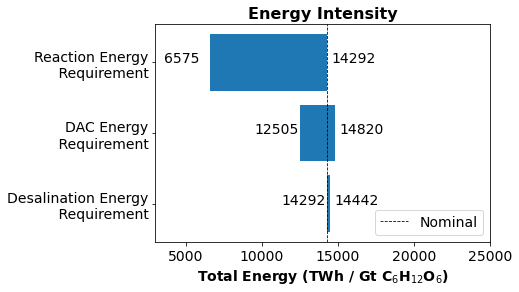

In [9]:
#Plot Generation

#The results of the parameter varaition were put into a pandas data frame so the values could later be sorted
#params is the parameter name of each bar 
#values is the difference between the max and min of the parameter variation (bar width)
#start is the minimum point of the parameter variation and defines the starting value of each bar
#For the desaliniation energy requirement the value 150 was hardcoded to make sure a bar appeared in the diagram
#this is just for visual purpose since the actual variation is so small it doesn't show up
#The correct values are reported as the data labels
df = pd.DataFrame(
    dict(
        params = ['DAC Energy\n Requirement','Reaction Energy\n Requirement','Desalination Energy\n Requirement'],
        values = [E_sen_1[-1]-E_sen_1[0] ,E_sen_2[-1]-E_sen_2[0], 150],
        start = [E_sen_1[0],E_sen_2[0],E_sen_3[0]]
    )
)

#The command below sorts the 'values' (barwidth) so they are displayed in the diagram as highest to lowest
#This ensures the tornado-like appearence
df_sorted = df.sort_values('values')

#re-index the dataframe to go 0-5 after sorting
df_sorted['index'] = np.arange(0,len(df['params']),1)
df_sorted.set_index('index',inplace=True)

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
p = ax.barh('params','values', data=df_sorted,left='start')
ax.set_title('Energy Intensity', fontsize=16, fontweight='bold')
ax.set_xlabel('Total Energy (TWh / Gt C$_6$H$_{12}$O$_6$)', fontsize=14, fontweight='bold')
ax.axvline((energy_intensity()/kj_per_kg_to_TWh_per_Gt), color='black', linewidth=0.8, linestyle='--',label='Nominal')
ax.legend(loc='lower right',fontsize=14)

#limits for left and right of x axis
ax.set_xlim(left=3000)
ax.set_xlim(right=25000)

#Setting bar labels
#left side labels
shift_l = 3000
for i in range(len(df_sorted['start'])):
    plt.text(df_sorted['start'][i] - shift_l,i,round(df_sorted['start'][i]),fontsize=14)

#right side labels
shift_r = 300
for i in range(len(df_sorted['start'])):
    plt.text(df_sorted['start'][i] + df_sorted['values'][i] + shift_r,i,round(df_sorted['start'][i] + df_sorted['values'][i]),fontsize=14)


print('Nominal Case:', np.round((energy_intensity()/kj_per_kg_to_TWh_per_Gt),2),'TWh / Gt glucose')


plt.savefig('energytornado.pdf',bbox_inches='tight')
plt.savefig('energytornado.png',bbox_inches='tight')
plt.show()

### GHG Emissions Intensity, Panel (b) 

In [10]:
#Parameter Variation
#Parameter: DAC energy requirement
co2_sen_1 = np.zeros(len(E_DAC)) #creates empty array to store sensitivity results

for i in range(len(E_DAC)):
    co2_sen_1[i] = emissions_intensity(energy=energy_intensity(E_DAC=E_DAC[i]))[0]
    
#Parameter: Reaction energy requirement
co2_sen_2 = np.zeros(len(E_reaction)) #creates empty array to store sensitivity results

for i in range(len(E_reaction)):
    co2_sen_2[i] = emissions_intensity(energy=energy_intensity(E_reaction=E_reaction[i]))[0]
    
#Parameter: Water efficiency
co2_sen_3 = np.zeros(len(water_efficiency)) #creates empty array to store sensitivity results

for i in range(len(water_efficiency)):
    co2_sen_3[i] = emissions_intensity(energy=energy_intensity(water_efficiency=water_efficiency[i]))[0]  
    
#Parameter: Solar CO2 intensity, see SI Table 1
CO2_intensity_s = np.linspace(3,38,20) #gCO2eq/kWh
co2_sen_4 = np.zeros(len(CO2_intensity_s)) #creates empty array to store sensitivity results

for i in range(len(CO2_intensity_s)):
    co2_sen_4[i] = emissions_intensity(CO2_intensity=CO2_intensity_s[i], energy=energy_intensity())[0]

#Parameter: NG CO2 intensity, see SI Table 1
CO2_intensity_ng = np.linspace(450,670,20) #gCO2eq/kWh
co2_sen_5 = np.zeros(len(CO2_intensity_ng)) #creates empty array to store sensitivity results


for i in range(len(CO2_intensity_ng)):
    co2_sen_5[i] = emissions_intensity(CO2_intensity=CO2_intensity_ng[i], energy=energy_intensity())[0]

#Parameter: Coal CO2 intensity, see SI Table 1
CO2_intensity_c = np.linspace(675,1689,20) #gCO2eq/kWh
co2_sen_6 = np.zeros(len(CO2_intensity_c)) #creates empty array to store sensitivity results

for i in range(len(CO2_intensity_c)):
    co2_sen_6[i] = emissions_intensity(CO2_intensity=CO2_intensity_c[i], energy=energy_intensity())[0]

Nominal case: -1.32   CO2eq / Gt glucose


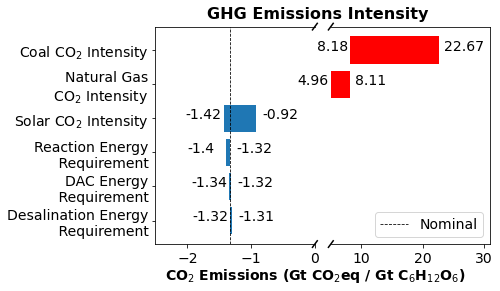

In [11]:
#Plot Generation

#The results of the parameter varaition were put into a pandas data frame so the values could later be sorted
#params is the parameter name of each bar 
#values is the difference between the max and min of the parameter variation (bar width)
#start is the minimum point of the parameter variation and defines the starting value of each bar
#For the desaliniation energy requirement the value 0.017 was hardcoded to make sure a bar appeared in the diagram
#this is just for visual purpose since the actual variation is so small it doesn't show up
#The correct values are reported as the data labels
df = pd.DataFrame(
    dict(
        params = ['DAC Energy\n Requirement','Reaction Energy\n Requirement','Solar CO$_2$ Intensity','Desalination Energy\n Requirement','Natural Gas\n CO$_2$ Intensity','Coal CO$_2$ Intensity'],
        values = [co2_sen_1[-1]-co2_sen_1[0] ,co2_sen_2[-1]-co2_sen_2[0],co2_sen_4[-1]-co2_sen_4[0],0.017,co2_sen_5[-1]-co2_sen_5[0],co2_sen_6[-1]-co2_sen_6[0]],
        start = [co2_sen_1[0],co2_sen_2[0],co2_sen_4[0],co2_sen_3[0],co2_sen_5[0],co2_sen_6[0]]
  
    )
)

#The command below sorts the 'values' (barwidth) so they are displayed in the diagram as highest to lowest
#This ensures the tornado-like appearence
df_sorted = df.sort_values('values')

#re-index the dataframe to go 0-5 after sorting
df_sorted['index'] = np.arange(0,len(df['params']),1)
df_sorted.set_index('index',inplace=True)

#To create the broken axis create 2 subplots and merge together
fig, (ax,ax2) = plt.subplots(1,2,sharey=True)
p = ax.barh('params','values', data=df_sorted,left='start')
h = ax2.barh('params','values', data=df_sorted,left='start',color='red')
plt.suptitle('GHG Emissions Intensity',y=0.95, fontsize=16, fontweight='bold')
ax.set_xlabel('CO$_2$ Emissions (Gt CO$_2$eq / Gt C$_6$H$_{12}$O$_6$)',fontsize=14, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=14)
ax2.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax2.axvline(emissions_intensity()[0], color='black', linewidth=0.8, linestyle='--',label='Nominal')
ax.axvline(emissions_intensity()[0], color='black', linewidth=0.8, linestyle='--',label='Nominal')
ax2.legend(loc='lower right', fontsize=14)

#limits for left and right of x axis
ax.set_xlim(left=-2.5,right=0)
ax2.set_xlim(left=5,right=31)
fig.subplots_adjust(wspace=0.1)
ax.xaxis.set_label_coords(1,-0.1)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax.yaxis.tick_left()


#adding the diagonal lines between broken axis
d = .015 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

#Setting bar labels
#left side labels (red bars)
shift_l = 5.5
for i in [4,5]:
    ax2.text(df_sorted['start'][i] - shift_l,i,np.round(df_sorted['start'][i],2),fontsize=14)

#right side labels (red bars)
shift_r = 0.8
for i in [4,5]:
    ax2.text(df_sorted['start'][i] + df_sorted['values'][i] + shift_r,i,np.round(df_sorted['start'][i] + df_sorted['values'][i],2),fontsize=14)

#left side labels (blue bars)
shift_l = 0.6
for i in [0,1,2,3]:
    ax.text(df_sorted['start'][i] - shift_l,i,np.round(df_sorted['start'][i],2),fontsize=14)

#right side labels (blue bars)
shift_r = 0.1
for i in [0,1,2,3]:
    ax.text(df_sorted['start'][i] + df_sorted['values'][i] + shift_r,i,np.round(df_sorted['start'][i] + df_sorted['values'][i],2),fontsize=14)

    
    
print('Nominal case:',np.round(emissions_intensity()[0],2),'  CO2eq / Gt glucose')

plt.savefig('ghgemissionstornado.pdf',bbox_inches='tight')
plt.savefig('ghgemissionstornado.png',bbox_inches='tight')
plt.show()

### Land-use Intensity, Panel (c)

In [12]:
#Parameter Variation
#(hectares/million hectares)
million_hectares=1e6

#Parameter: Reaction energy req
land_u1 = np.zeros(len(E_reaction)) #creates empty array to store sensitivity results

for i in range(len(E_reaction)):
    land_u1[i]= land_intensity(energy=energy_intensity(E_reaction=E_reaction[i]))/million_hectares

#Parameter: DAC energy req
land_u2=np.zeros(len(E_DAC)) #creates empty array to store sensitivity results

for i in range(len(E_DAC)):
    land_u2[i]= land_intensity(energy=energy_intensity(E_DAC=E_DAC[i]))/million_hectares

#Parameter: Water efficiency
land_u3 = np.zeros(len(water_efficiency)) #creates empty array to store sensitivity results

for i in range(len(water_efficiency)):
    land_u3[i]= land_intensity(energy=energy_intensity(water_efficiency=water_efficiency[i]))/million_hectares

#Parameter: LAU factor
lau_factor = np.linspace(229,552,20) #m2/GWh
land_u4 = np.zeros(len(lau_factor)) #creates empty array to store sensitivity results

for i in range(len(lau_factor)):
    land_u4[i] = land_intensity(energy=energy_intensity(), lau=lau_factor[i])/million_hectares

Nominal case: 0.71  million hectares / Gt glucose


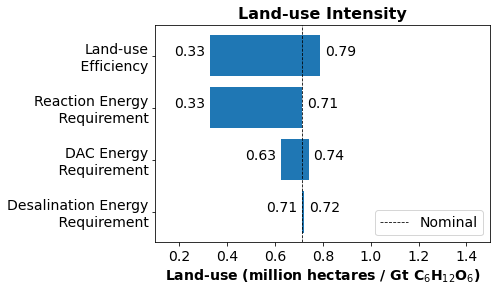

In [13]:
#Plot Generation

#The results of the parameter varaition were put into a pandas data frame so the values could later be sorted
#params is the parameter name of each bar 
#values is the difference between the max and min of the parameter variation (bar width)
#start is the minimum point of the parameter variation and defines the starting value of each bar
#For the desaliniation energy requirement the value 0.008 was hardcoded to make sure a bar appeared in the diagram
#this is just for visual purpose since the actual variation is so small it doesn't show up
#The correct values are reported as the data labels
df = pd.DataFrame(
    dict(
        params = ['DAC Energy\n Requirement','Reaction Energy\n Requirement','Desalination Energy\n Requirement','Land-use\n Efficiency'],
        values = [land_u2[-1]-land_u2[0] ,land_u1[-1]-land_u1[0], 0.008, land_u4[-1]-land_u4[0]],
        start = [land_u2[0],land_u1[0],land_u3[0],land_u4[0]]
    )
)

#The command below sorts the 'values' (barwidth) so they are displayed in the diagram as highest to lowest
#This ensures the tornado-like appearence
df_sorted = df.sort_values('values')

#re-index the dataframe to go 0-5 after sorting
df_sorted['index']= np.arange(0,len(df['params']),1)
df_sorted.set_index('index',inplace=True)

fig, ax = plt.subplots()
p = ax.barh('params','values', data=df_sorted,left='start')
ax.set_title('Land-use Intensity',fontsize=16, fontweight='bold')
ax.set_xlabel('Land-use (million hectares / Gt C$_6$H$_{12}$O$_6$)',fontsize=14, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(land_intensity()/million_hectares, color='black', linewidth=0.8, linestyle='--',label='Nominal')
ax.legend(loc='lower right',fontsize=14)

#limits for left and right of x axis
ax.set_xlim(left=.1)
ax.set_xlim(right=1.5)

#Setting bar labels
#left side labels
shift_l = 0.15
for i in range(len(df_sorted['start'])):
    plt.text(df_sorted['start'][i] - shift_l,i,np.round(df_sorted['start'][i],2),fontsize=14)

#right side labels
shift_r = 0.02
for i in range(len(df_sorted['start'])):
    plt.text(df_sorted['start'][i] + df_sorted['values'][i] + shift_r,i,np.round(df_sorted['start'][i] + df_sorted['values'][i],2),fontsize=14)


print('Nominal case:', np.round((land_intensity()/million_hectares),2),' million hectares / Gt glucose')

plt.savefig('landusetornado.pdf', bbox_inches='tight')
plt.savefig('landusetornado.png',bbox_inches='tight')

plt.show()

### Artificial Carbohydrate Cost, Panel (d)

In [14]:
#Parameter Variation

#($/trillion $)
trillion_USD = 1e12

#Parameter: DAC energy req
cost_sen_1 = np.zeros(len(E_DAC)) #creates empty array to store sensitivity results

for i in range(len(E_DAC)):
    cost_sen_1[i] = carb_cost(energy=energy_intensity(E_DAC=E_DAC[i])) / trillion_USD
    
#Parameter: Reaction energy req
cost_sen_2 = np.zeros(len(E_reaction)) #creates empty array to store sensitivity results

for i in range(len(E_reaction)):
    cost_sen_2[i] = carb_cost(energy=energy_intensity(E_reaction=E_reaction[i])) / trillion_USD
    
#Parameter: Solar Energy cost see SI Table 1
energy_cost_s = np.linspace(50,200,20) #$/MWh
cost_sen_3 = np.zeros(len(energy_cost_s)) #creates empty array to store sensitivity results

for i in range(len(energy_cost_s)):
    cost_sen_3[i] = carb_cost(energy=energy_intensity(), energy_cost=energy_cost_s[i]) / trillion_USD

#Parameter: Water efficiency
cost_sen_4 = np.zeros(len(water_efficiency)) #creates empty array to store sensitivity results

for i in range(len(water_efficiency)):
    cost_sen_4[i] = carb_cost(energy=energy_intensity(water_efficiency=water_efficiency[i])) / trillion_USD
    
#Parameter: NG Energy cost see SI Table 1
energy_cost_ng = np.linspace(50,166,20) #$/MWh
cost_sen_5 = np.zeros(len(energy_cost_ng)) #creates empty array to store sensitivity results

for i in range(len(energy_cost_ng)):
    cost_sen_5[i] = carb_cost(energy=energy_intensity(), energy_cost=energy_cost_ng[i]) / trillion_USD

#Parameter: Coal Energy cost see SI Table 1
energy_cost_c = np.linspace(50,112,20) #$/MWh
cost_sen_6 = np.zeros(len(energy_cost_c)) #creates empty array to store sensitivity results

for i in range(len(energy_cost_c)):
    cost_sen_6[i] = carb_cost(energy=energy_intensity(), energy_cost=energy_cost_c[i]) / trillion_USD

Nominal case: 1.14  trillion USD / Gt glucose


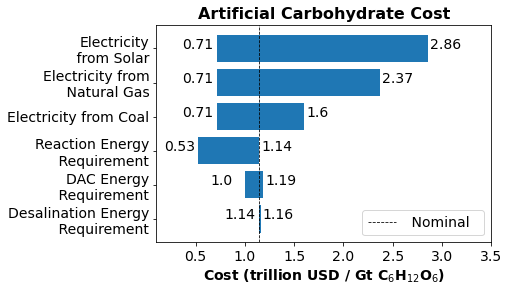

In [15]:
#Plot Generation

#The results of the parameter varaition were put into a pandas data frame so the values could later be sorted
#params is the parameter name of each bar 
#values is the difference between the max and min of the parameter variation (bar width)
#start is the minimum point of the parameter variation and defines the starting value of each bar
#For the desaliniation energy requirement the value 0.018 was hardcoded to make sure a bar appeared in the diagram
#this is just for visual purpose since the actual variation is so small it doesn't show up
#The correct values are reported as the data labels
df = pd.DataFrame(
    dict(
        params = ['DAC Energy\n Requirement','Reaction Energy\n Requirement','Electricity\n from Solar','Desalination Energy\n Requirement','Electricity from\n Natural Gas','Electricity from Coal'],
        values = [cost_sen_1[-1]-cost_sen_1[0] ,cost_sen_2[-1]-cost_sen_2[0],cost_sen_3[-1]-cost_sen_3[0],0.018,cost_sen_5[-1]-cost_sen_5[0],cost_sen_6[-1]-cost_sen_6[0]],
        start = [cost_sen_1[0],cost_sen_2[0],cost_sen_3[0],cost_sen_4[0],cost_sen_5[0],cost_sen_6[0]]
    )
)

#The command below sorts the 'values' (barwidth) so they are displayed in the diagram as highest to lowest
#This ensures the tornado-like appearence
df_sorted = df.sort_values('values')

#re-index the dataframe to go 0-5 after sorting
df_sorted['index'] = np.arange(0,len(df['params']),1)
df_sorted.set_index('index',inplace=True)

fig, ax = plt.subplots()

p = ax.barh('params','values', data=df_sorted,left='start')
ax.set_title('Artificial Carbohydrate Cost',fontsize=16, fontweight='bold')
ax.set_xlabel('Cost (trillion USD / Gt C$_6$H$_{12}$O$_6$)',fontsize=14, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(carb_cost()/trillion_USD, color='black', linewidth=0.8, linestyle='--',label=' Nominal  ')
ax.legend(fontsize=14)

#limits for left and right of x axis
ax.set_xlim(left=0.1)
ax.set_xlim(right=3.5)

#Setting bar labels
#left side labels
shift_l = 0.35
for i in range(len(df_sorted['start'])):
    plt.text(df_sorted['start'][i] - shift_l,i,np.round(df_sorted['start'][i],2),fontsize=14)

#right side labels
shift_r = 0.02
for i in range(len(df_sorted['start'])):
    plt.text(df_sorted['start'][i] + df_sorted['values'][i] + shift_r,i,np.round(df_sorted['start'][i] + df_sorted['values'][i],2),fontsize=14)


print('Nominal case:', np.round(carb_cost()/trillion_USD,2),' trillion USD / Gt glucose')

plt.savefig('costtornado.pdf',bbox_inches='tight')
plt.savefig('costtornado.png',bbox_inches='tight')
plt.show()

## Two Dimentional Sensitivity

This section of code generates Figure S1 in the SI.

### Energy Intensity, Panel (a)

In [16]:
#Create Mesh
E_reaction = np.linspace(2804,8000,20)
E_DAC = np.linspace(50,300,20)

r,dac = np.meshgrid(E_reaction,E_DAC)

#(TWh/PWh)
TWh_to_PWh = 1000

total_E = energy_intensity(E_DAC=dac, E_reaction=r) / kj_per_kg_to_TWh_per_Gt / TWh_to_PWh

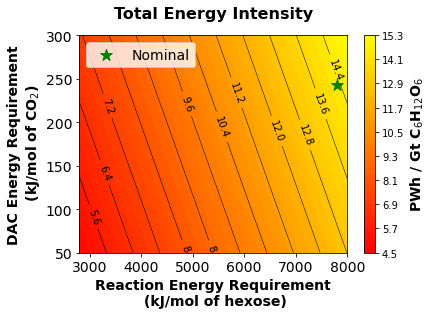

In [17]:
#Generate Plot
fig, ax = plt.subplots()

plt.contourf(r,dac,total_E, cmap='autumn',levels=40)
cbar=plt.colorbar()
c3 = plt.contour(r,dac,total_E, colors='black', linewidths=0.5, levels=12)
plt.scatter(7800,243, color="green",s=150, label = "Nominal", marker = "*") #Plotting nominal values (see SI)
plt.title('Total Energy Intensity',weight = 'bold',y=1.05, fontsize=16)
plt.xlabel('Reaction Energy Requirement\n (kJ/mol of hexose)',weight = 'bold', fontsize=14)
plt.legend(loc ='upper left', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.clabel(c3, c3.levels, inline=True, fontsize=10)
plt.ylabel('DAC Energy Requirement\n (kJ/mol of CO$_2$)',weight = 'bold', fontsize=14)
cbar.set_label('PWh / Gt C$_6$H$_{12}$O$_6$',weight = 'bold', fontsize=14)
plt.savefig('energyheatmap.png',bbox_inches='tight')
plt.savefig('energyheatmap.pdf',bbox_inches='tight')
plt.show()

### GHG Emissions Intensity, Panel (b)

In [18]:
#Create Mesh
CO2_intensity = np.linspace(0,1750,20)

r,co2 = np.meshgrid(E_reaction,CO2_intensity)

emissions =  emissions_intensity(CO2_intensity=co2,energy=energy_intensity(E_reaction=r))[0]

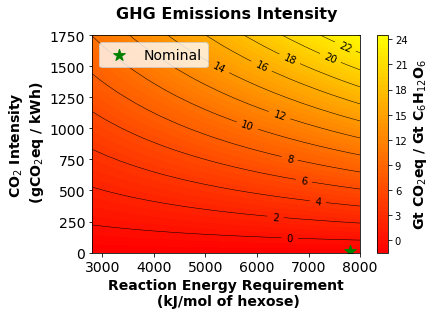

In [19]:
#Generate Plot
fig, ax = plt.subplots()

plt.contourf(r,co2,emissions, cmap='autumn',levels=60)
cbar = plt.colorbar()
cs = plt.contour(r,co2,emissions, colors='k', linewidths=0.5, levels=12)
plt.scatter(7800,10, color="green",s=150, label = "Nominal", marker = "*") #Plotting nominal values (see SI)
plt.title('GHG Emissions Intensity', weight='bold',y=1.05, fontsize=16)
plt.xlabel('Reaction Energy Requirement\n (kJ/mol of hexose)',weight = 'bold', fontsize=14)
plt.yticks([0,250,500,750,1000,1250,1500,1750])
plt.ylabel('CO$_2$ Intensity\n (gCO$_2$eq / kWh)',weight = 'bold', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.legend(loc='upper left', fontsize=14)
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
cbar.set_label('Gt CO$_2$eq / Gt C$_6$H$_{12}$O$_6$',weight = 'bold', fontsize=14)
plt.savefig('ghgheatmap.pdf',bbox_inches='tight')
plt.savefig('ghgheatmap.png',bbox_inches='tight')
plt.show()

### Land-use Intensity, Panel (c)

In [20]:
#Create Mesh
lau = np.linspace(229,551,20)

r,l = np.meshgrid(E_reaction,lau)

land = land_intensity(energy=energy_intensity(E_reaction=r),lau=l)/million_hectares

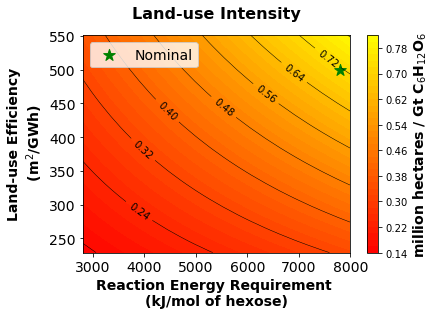

In [21]:
#Generate Plot
fig, ax = plt.subplots()

plt.contourf(r,l,land, cmap='autumn',levels=40)
cbar = plt.colorbar()
c1 = plt.contour(r,l,land, colors='k', linewidths=0.5, levels=9)
plt.scatter(7800,500, color="green",s=150, label = "Nominal", marker = "*") #Plotting nominal values (see SI)
plt.title('Land-use Intensity', weight='bold',y=1.05, fontsize=16)
plt.xlabel('Reaction Energy Requirement \n(kJ/mol of hexose)',weight = 'bold', fontsize=14)
plt.ylabel('Land-use Efficiency\n (m$^2$/GWh)',weight = 'bold', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.legend(loc = 'upper left', fontsize=14)
ax.clabel(c1, c1.levels, inline=True, fontsize=10)
cbar.set_label('million hectares / Gt C$_6$H$_{12}$O$_6$',weight = 'bold', fontsize=14)
plt.savefig('landheatmap.png',bbox_inches='tight')
plt.savefig('landheatmap.pdf',bbox_inches='tight')
plt.show()

### Artificial Carbohydrate Cost, Panel (d)

In [22]:
#Create Mesh
cost = np.linspace(50,200,20)

r,c = np.meshgrid(E_reaction,cost)

price = carb_cost(energy=energy_intensity(E_reaction=r), energy_cost=c)/trillion_USD

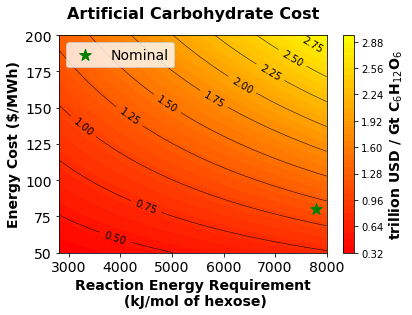

In [23]:
#Generate Plot
fig, ax = plt.subplots()

plt.contourf(r,c,price, cmap='autumn', levels=40)
cbar = plt.colorbar()
c2 = plt.contour(r,c,price, colors='k', linewidths=0.5, levels=11)
plt.scatter(7800,80, color="green",s=150, label = "Nominal", marker = "*") #Plotting nominal values (see SI)
plt.title('Artificial Carbohydrate Cost', weight='bold',y=1.05, fontsize=16)
plt.xlabel('Reaction Energy Requirement\n (kJ/mol of hexose)',weight = 'bold', fontsize=14)
plt.ylabel('Energy Cost ($/MWh)',weight = 'bold', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.clabel(c2, c2.levels, inline=True, fontsize=10)
cbar.set_label('trillion USD / Gt C$_6$H$_{12}$O$_6$',weight = 'bold', fontsize=14)
plt.savefig('costheatmap.png',bbox_inches='tight')
plt.savefig('costheatmap.pdf',bbox_inches='tight')
plt.show()